### Question 1
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

##### a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

Let's begin by loading the data into a dataframe. 

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


I would like to take a closer look at the numerical columns of this dataframe. I am suspecting that the high AOV calculated in the question may be due to a few outliers in the data.

In [42]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The first thing I notice is how high the maximum order_amount and total_items are at $704,000 and 2000 respectively. Considering this dataset contains the data for orders made to sneaker shops, I find it odd that these values are so high. 

I can also see the AOV amount of $3145.13 stated in the question, which corresponds to the mean value of the order_amount column.

To dig further into this, let's try to look at the distribution of these two columns based on their payment_method:

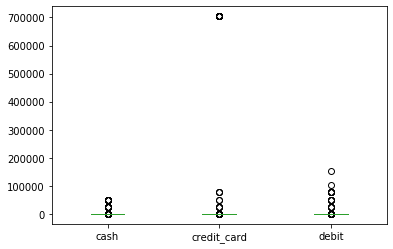

In [29]:
df_order_amount = df.pivot_table(index='order_id', columns='payment_method', values='order_amount')
df_order_amount.plot(kind='box')

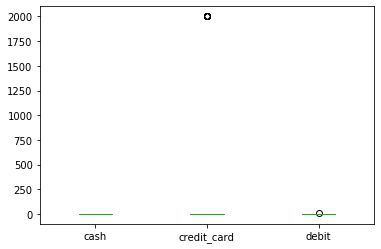

In [30]:
df_total_items = df.pivot_table(index='order_id', columns='payment_method', values='total_items')
df_total_items.plot(kind='box')

Based on the above two plots, it looks like the issue is regarding some credit card payments with really high amounts for total_items and order_amount. Let's try to take a look at these values in the actual data.

In [37]:
df.sort_values(by='order_amount', ascending=False).head(25)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


In [38]:
df.sort_values(by='total_items', ascending=False).head(25)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


It seems like the outliers for both order_amount and total_items are resulting from the same 17 orders. I noticed immediately the created_at time for these rows. All these orders were placed at exactly 4 o'clock. All these orders were for the same number of items and for the same order amount, by the same user at the same store.

These odd entries could be a possible reason for the high AOV value calculated in the provided question. 

##### b) What metric would you report for this dataset?

Instead of using the mean of the order_amount value, I would recommend using the median instead which would return the central location of the data, especially useful for skewed distributions like this one.

The median value can be taken from the describe() table we generated before.

##### c) What is its value?

In [44]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The median value of order_amount is 284, which is comparably much lower than the previously reported 3145.13

### Question 2
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

##### a) How many orders were shipped by Speedy Express in total?



SELECT COUNT(*)  
FROM ORDERS  
WHERE ShipperID IN  
                    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(SELECT ShipperID  
                    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FROM SHIPPERS  
                    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHERE ShipperName = "Speedy Express");

#### Answer: 54

##### b) What is the last name of the employee with the most orders?


SELECT LastName  
FROM  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(SELECT EMPLOYEES.LastName AS LastName, COUNT(*) AS num_orders  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FROM ORDERS o  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;JOIN EMPLOYEES e  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ON o.EmployeeID = e.EmployeeID  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;GROUP BY e.LastName  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ORDER BY num_orders desc  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LIMIT 1);

#### Answer: Peacock

##### c) What product was ordered the most by customers in Germany?

SELECT p.ProductName  
FROM Products p  
JOIN (SELECT od.ProductID, SUM(od.Quantity) as num_orders  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FROM OrderDetails od  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;JOIN ORDERS o  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ON od.OrderID = o.OrderID  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;JOIN CUSTOMERS c  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ON o.CustomerID = c.CustomerID  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHERE c.Country = "Germany"  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;GROUP BY od.ProductID  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ORDER BY num_orders desc  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LIMIT 1) m  
ON p.ProductID = m.ProductID;  

#### Answer: Boston Crab Meat